# GC Log Processing
#### Ellis Brown, 2021

### Specify a log file in the cell for "Path" below, then run all cells to run analysis on the gc log processing.

In [8]:
# Path to GC LOG file.
# Create gc log file by running with the following flags:

# ""-Xlog:gc*,gc+phases=debug:file=FILENAME.log"

path='/Users/ellisbrown/Desktop/Project/bucket_parse/ex.csv'

In [9]:
# Overhead : For development only.
%load_ext autoreload
%autoreload 2

### Begin processing log information. Plots data and trends

Length list 1: 93
Length list 2: 93
Type of x entry <class 'float'>
Values in X list:
3.556
4.915
6.07
6.293
6.492
6.718
7.012
7.258
7.419
8.707
9.793
10.821
12.086
14.227
16.27
21.705
62.489
1509.772
1575.452
1624.918
1659.813
1739.934
1787.24
1830.966
1890.995
1927.918
1987.489
2021.117
2093.386
2122.798
2213.778
2260.626
2327.163
2359.184
2445.982
2509.552
2534.721
2630.35
2706.605
2747.41
2836.521
2917.225
2953.243
3035.077
3114.398
3164.823
3247.524
3304.479
3380.725
3445.446
3473.641
3545.129
3608.271
3644.494
3706.104
3773.158
3808.173
3864.388
3928.114
3991.583
4054.45
4115.594
4178.563
4241.721
4295.803
4355.357
4417.475
4468.898
4520.145
4568.598
4620.685
4671.673
4716.518
4765.944
4808.229
4857.273
4900.307
4901.816
4907.739
4913.495
4919.169
4924.042
4928.35
5000.026
5067.497
5131.193
5172.759
5234.641
5274.693
5339.123
5376.928
5433.338
5474.724
Max wait: 227.891 ms
Total wait: 10983.897 ms
Average wait: 118.1064 ms


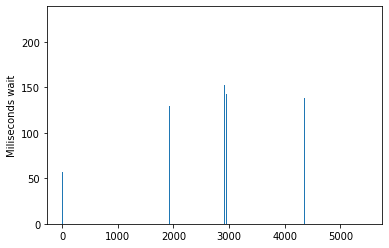

In [21]:
''' Begin processing log information into specific variables '''
from scripts import process_log as pl
from scripts import plot_data as dplt

# Set the path to the file we would like to analyze
pl.setLogPath("datasets/gc.log")

# Get the pauses information from that file.
df = pl.getPauses(create_csv = False)

# plot the data for pauses, printing to output the trends.
dplt.plot_pauses(df)




###Below is just testing. Temporary below.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path='/Users/ellisbrown/Desktop/Project/bucket_parse/ex.csv'


column_titles = ["Time, Memory Changed"]
df = pd.read_csv(path)
    #print(list(df.iloc[:,0]))
    #csv_reader=csv.reader(csv_file, delimiter=",", usecols = column_titles)
x_values = list(df.iloc[:,3])
x = []
for entry in x_values:
    x.append(entry[:-1])
y_values = list(df.iloc[:,0])
## Only plot the first 5, due to label confusion. TODO.
max_items = 10 #len(y_values) for max
plt.bar(x = x[:max_items], height = y_values[:max_items])


plt.ylabel("Miliseconds wait");

## Find interesting trends within the data.
def find_trends(df):
    wait_times = list(df.iloc[:,0])
    max_wait = max(wait_times, key = lambda i : float(i))
    print("Max wait: " + str(max_wait) + " ms")
    
    total_wait   = round(sum(float(i) for i in wait_times), 4)
    average_wait = round(total_wait / len(wait_times), 4)
    print("Total wait: " + str(total_wait) + " ms")
    print("Average wait: " + str(average_wait) + " ms")
find_trends(df)
    

In [ ]:
from scripts.ex import some_function
some_function()
